# Reflection Principle for Brownian Motion

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set the seed
np.random.seed(42)

## Simulate Brownian Motion

In [2]:
def brownian_motion(N, T, h, seed=42):
    """Simulates a Brownian motion.
    
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param float h: variance of the increments
    :param int seed: initial seed of the random generator
    :returns tuplpe: the brownian motion and its increments
    """
    # set the seed
    np.random.seed(seed)
    # the normalizing constant
    dt = 1. * T/N
    # the epsilon values
    random_increments = np.random.normal(0.0, 1.0 * h, N)*np.sqrt(dt)
    # calculate the brownian motion
    brownian_motion = np.cumsum(random_increments)
    # insert the initial condition
    brownian_motion = np.insert(brownian_motion, 0, 0.0)
    
    return brownian_motion, random_increments

## Generate the two processes

In [3]:
N = 10000 # number of discret points
T = 10 # number of time units
h = 2.75  # variance of the incremennts
seed = 1234 # the seed to use
dt = 1.0 * T/N  # total number of time steps

W, _ = brownian_motion(N, T, h, seed)  # standard Brownian Motion
min_W = np.min(W)  # min of W

t = np.linspace(0.0, N*dt, N+1)

a = 7.5  # the target value
a_idx = np.argwhere(W > a)[0][0]  # index of the target value
line_a = [a]*(N+1)  # the line for the threshold value

# generate the reflective process
W_star = [0]*(N+1)
W_star[:a_idx+1] = W[:a_idx+1]
W_star[a_idx+1:] = 2*a - W[a_idx+1:]

## Make the Animation

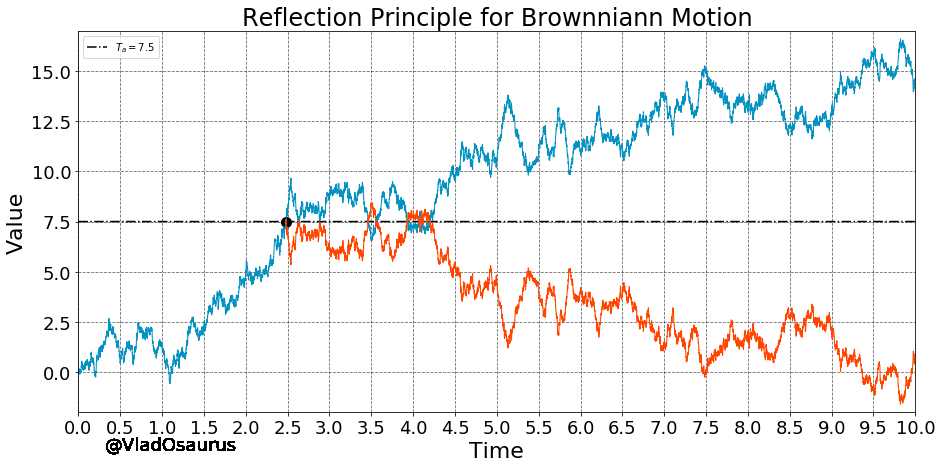

In [4]:
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(xlim=(0, T), ylim=(round(np.min(W_star)), round(np.max(W))))

# formatting options
ax.set_title('Reflection Principle for Brownniann Motion', fontsize=24)
ax.set_xlabel('Time', fontsize=22)
ax.set_ylabel('Value', fontsize=22)
ax.set_xticks(np.linspace(0, T, 2*T + 1))
ax.tick_params(labelsize=18)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

threshold_line, = ax.plot(t, line_a, linestyle='-.', color='black', label='$T_{a} = 7.5$')
threshold_point = ax.scatter(t[a_idx], a, s=100, c='k')

w_line, = ax.step([], [], where='mid', lw=1, color='#0492c2')  # line for the Brownian Motion
w_star_line, = ax.step([], [], where='mid', lw=1, color='#ff4500')  # line for the reflected Brownian Motion

ax.legend(loc=2)

# animation options
frames = 400
factor = N // frames
offset = (a_idx + 1) % factor
remainder = factor - offset

def animate(i):
    if (i + 1)*factor + offset < a_idx + 1:
        upper_bound = (i + 1)*factor + offset
    else:
        upper_bound = (i + 1)*factor
        w_star_line.set_data(t[(a_idx + 1):upper_bound], W_star[(a_idx + 1):upper_bound])
    
    w_line.set_data(t[:upper_bound], W[:upper_bound])
    plt.gcf().text(0.15, 0.05, '@VladOsaurus', fontsize=18)
    
    return w_line, w_star_line,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=25, blit=True)
# save the animation as mp4 video file 
anim.save('reflection_principle_bm.gif',writer='imagemagick') 